# Import Packages


In [1]:
import cv2
import numpy as np 
from matplotlib.image import imread
import matplotlib.pyplot as plt

# Gray-Scale

## Create An RGB IMAGE

In [13]:
RGBImage = np.array([[(255, 0, 0),(0 , 255, 0),(0, 0, 255)],
                        [(200, 70, 200),(255, 255, 255),(250, 50, 205)],
                        [(0, 0, 0),(200, 150, 50),(50, 50, 50)]])

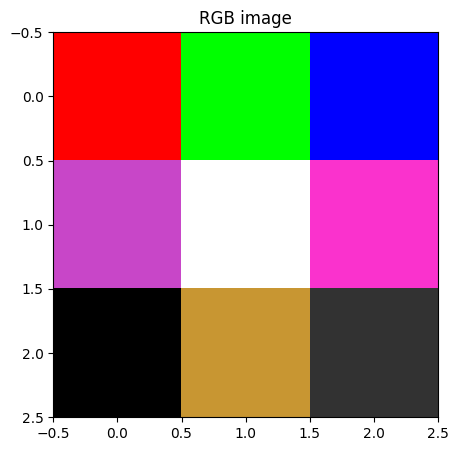

In [14]:
plt.subplots(figsize=(10 , 5)) 
plt.title("RGB image")
plt.imshow(RGBImage)
plt.show()

## GrayScale From Scratch

In [16]:
def BGR2GRAY (Image):
    Gray_image = np.dot(Image[..., :3], [0.299, 0.587, 0.114])
    return Gray_image.astype(np.uint8)

In [25]:
GrayImage = BGR2GRAY(RGBImage)
print(GrayImage) # If You Wanna A Matrix Of AN Image You Can Print It 

[[ 76 149  29]
 [123 255 127]
 [  0 153  50]]


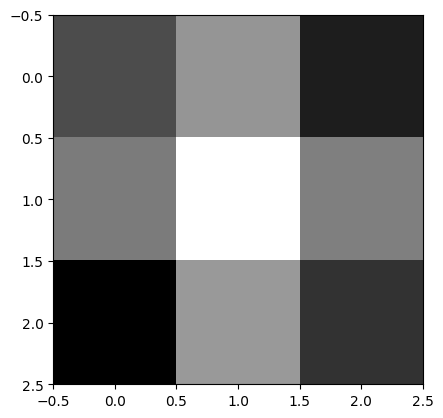

In [26]:
plt.imshow(GrayImage, cmap="gray")

## GrayScale With OpenCV

In [27]:
# Before Convert The Image You Must Convert An Image array To uint8 type
RGBImage = RGBImage.astype(np.uint8)  

GrayImage2= cv2.cvtColor(RGBImage, cv2.COLOR_RGB2GRAY)

print(GrayImage2) # If You Wanna A Matrix Of AN Image You Can Print It 

[[ 76 150  29]
 [124 255 127]
 [  0 154  50]]


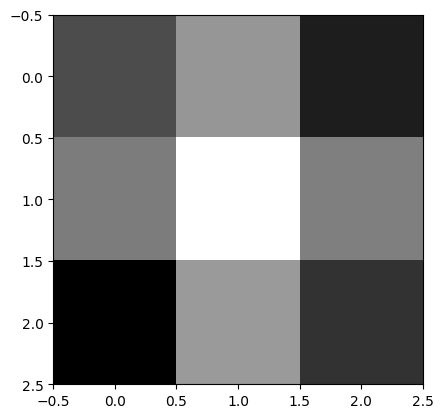

In [28]:
plt.imshow(GrayImage2, cmap = "gray")

## Simple Comparisn

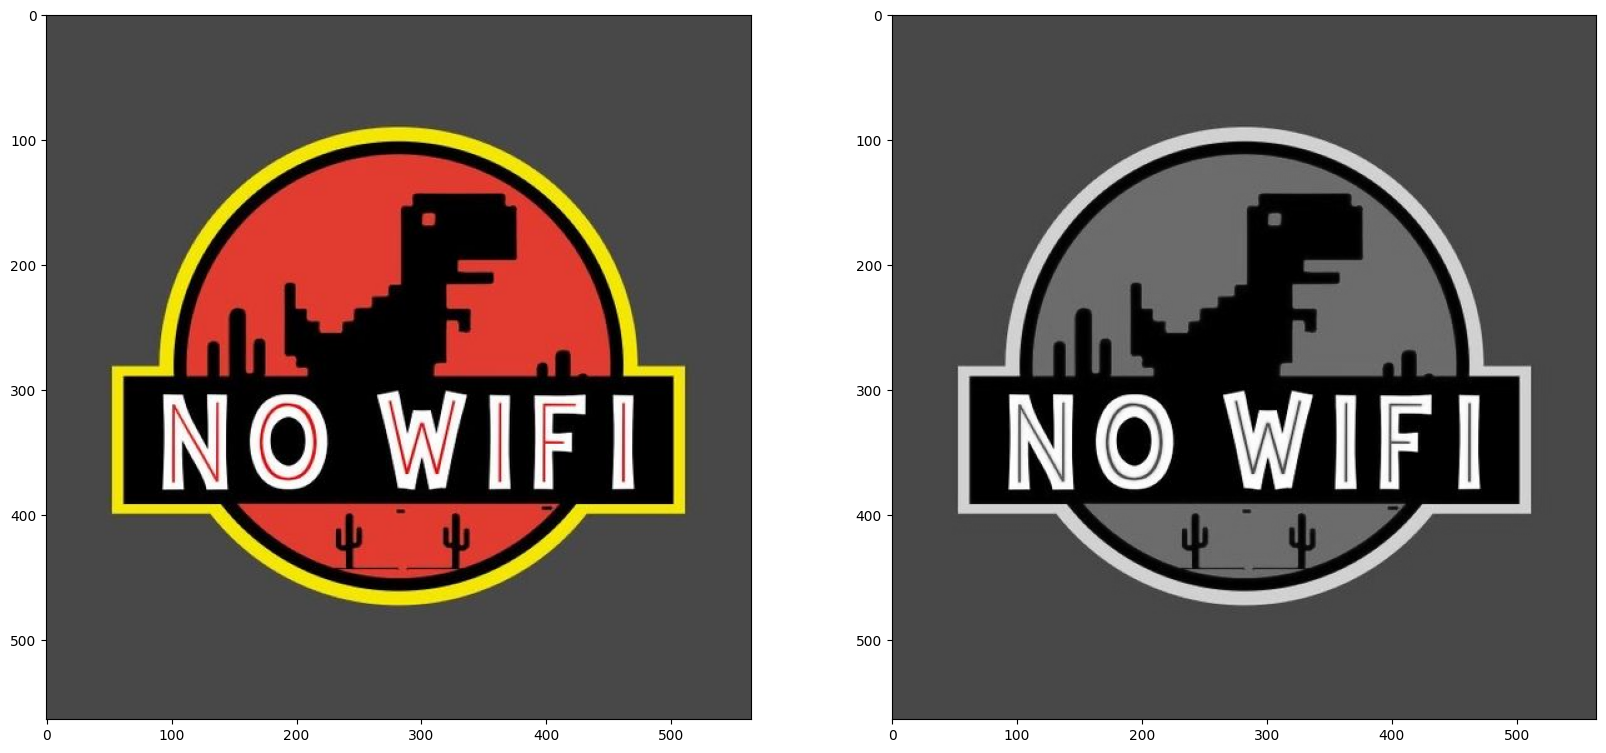

In [31]:
image = imread("../The_Data/Images/Wifi.jpg")
gray_image = BGR2GRAY(image) 
f , ( im1 , im2 ) = plt.subplots(1 , 2 , figsize = (20 , 10 ))
im1.imshow(image)
im2.imshow(gray_image , cmap = "gray")


# Histograms

In [39]:
img = cv2.imread("../The_Data/Images/Eye.jpg", 0)

## Normal image 

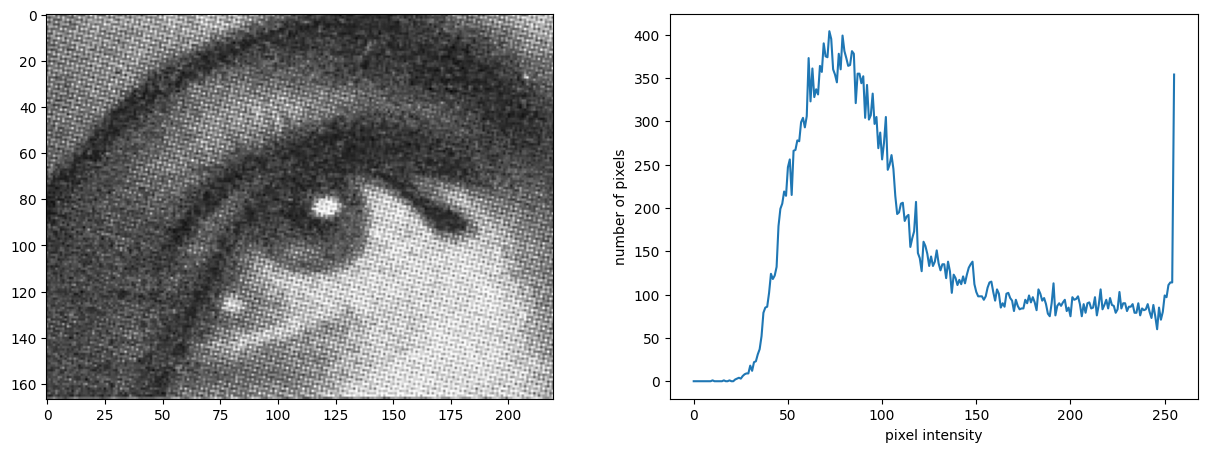

In [40]:
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

fig , ( ax1, ax2 ) = plt.subplots(1 , 2 , figsize = (15 , 5 ))

ax1.imshow(img, cmap='gray')
ax2.plot(hist)
plt.xlabel("pixel intensity")
plt.ylabel("number of pixels")
plt.show()

## Equalization Histograms 

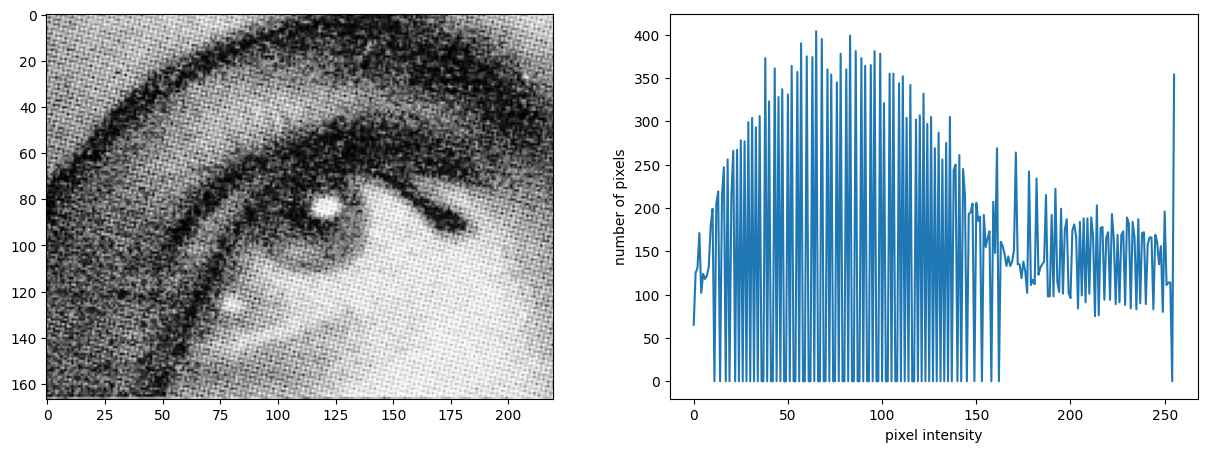

In [41]:
EImg = cv2.equalizeHist(img)
EHist = cv2.calcHist([EImg], [0], None, [256], [0, 256])

fig , ( ax1, ax2 ) = plt.subplots(1 , 2 , figsize = (15 , 5 ))

ax1.imshow(EImg,cmap='gray')
ax2.plot(EHist)
plt.xlabel("pixel intensity")
plt.ylabel("number of pixels")
plt.show()

## Clahe Histograms

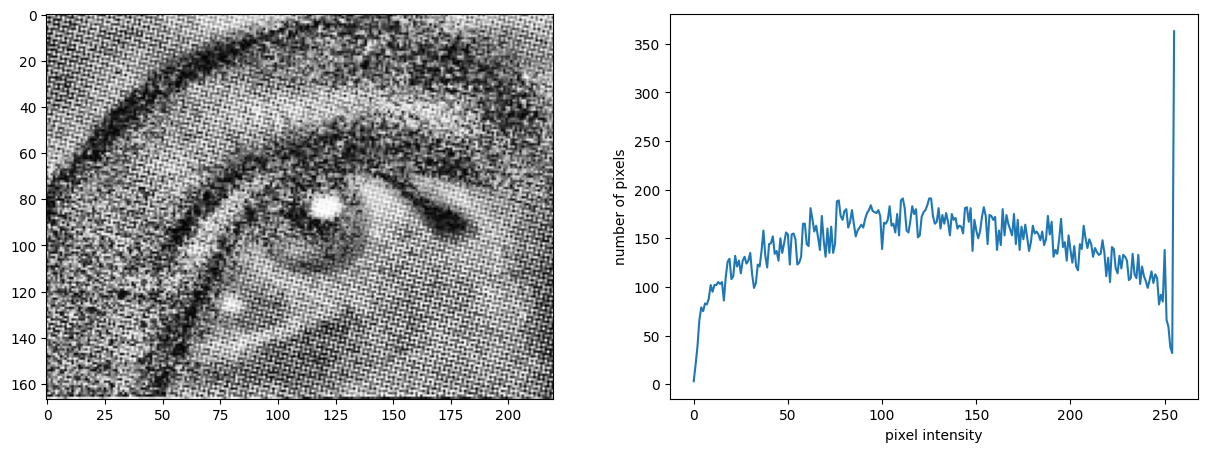

In [42]:
clahe  = cv2.createCLAHE(clipLimit=5, tileGridSize=(8,8))
claheImg = clahe.apply(img)
claheHist = cv2.calcHist([claheImg], [0], None, [256], [0, 256])

fig , ( ax1, ax2 ) = plt.subplots(1 , 2 , figsize = (15 , 5 ))

ax1.imshow(claheImg, cmap='gray')
ax2.plot(claheHist)
plt.xlabel("pixel intensity")
plt.ylabel("number of pixels")
plt.show()

## Comparison

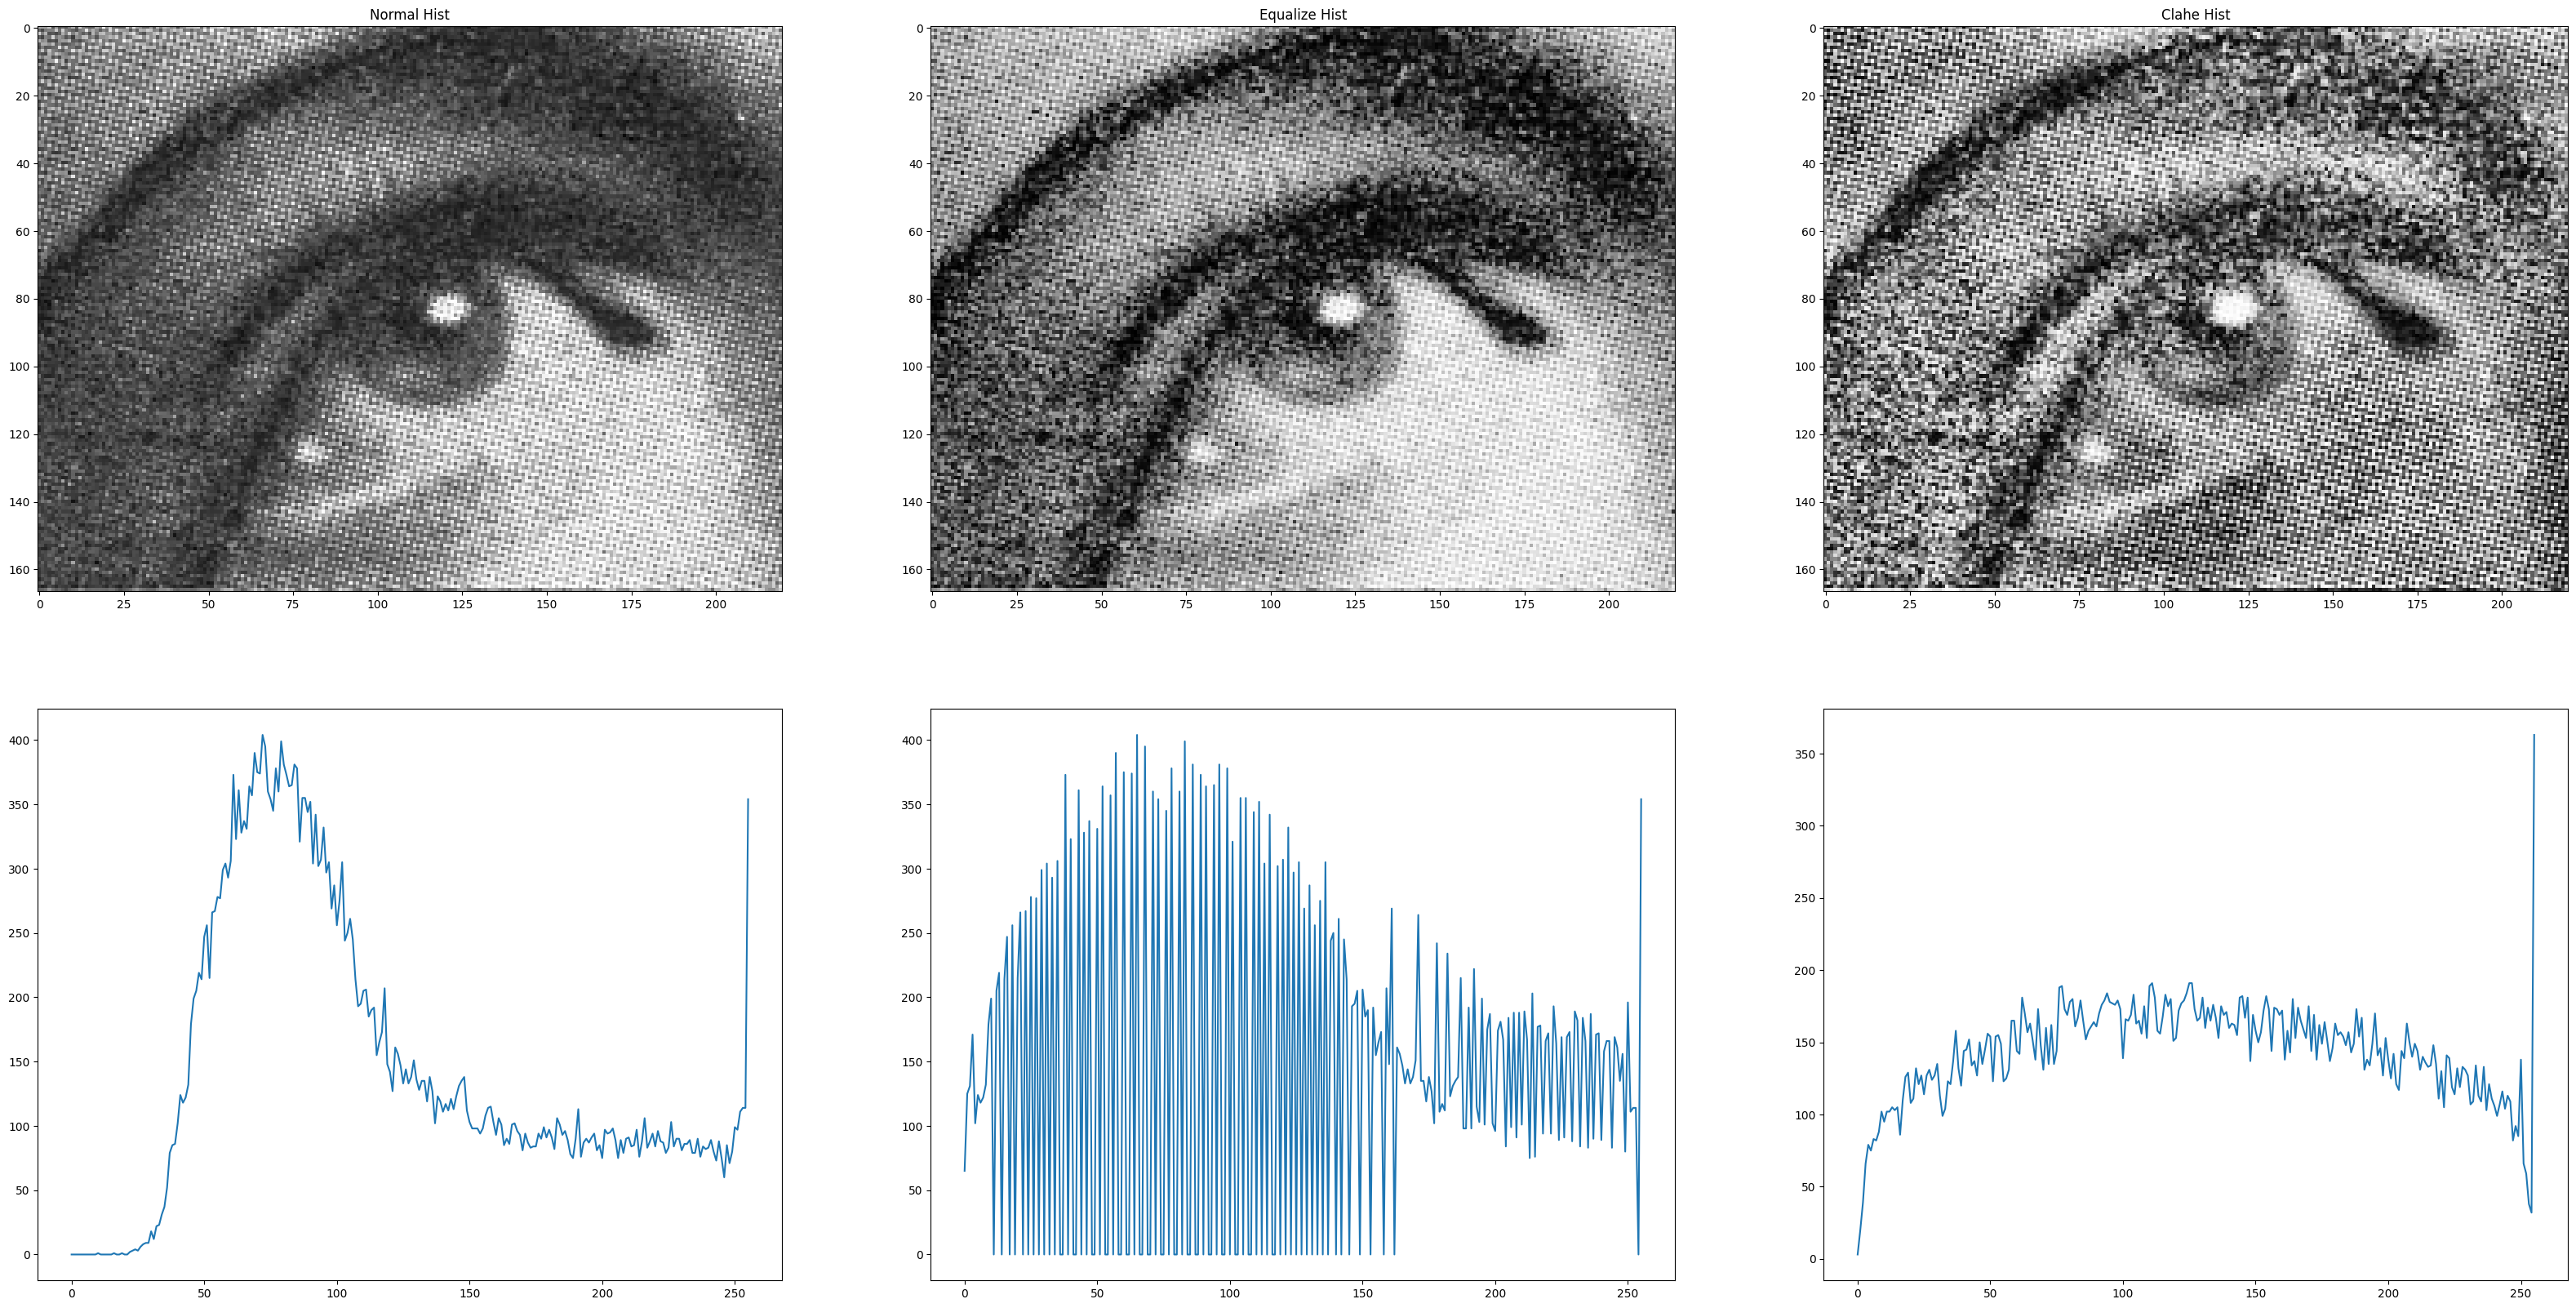

In [45]:
fig , (( ax1 , ax2 , ax3) , (ax11, ax22, ax33)) = plt.subplots(2, 3, figsize = (40 , 20))

ax1.imshow(img, cmap='gray')
ax1.set_title("Normal Hist")

ax2.imshow(EImg, cmap='gray')
ax2.set_title("Equalize Hist")

ax3.imshow(claheImg, cmap='gray')
ax3.set_title("Clahe Hist")

ax11.plot(hist)
ax22.plot(EHist)
ax33.plot(claheHist)

# Thanks !